# Multiclass Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

In [116]:
def evaluate(X, y, n_estimators = 70, criterion = 'gini'):
    forest = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion)
    forest.fit(X,y)
    scoring = ['f1_macro', 'precision_macro', 'recall_macro'] 
    scores = []
    cv = cross_validate(forest, X, y, cv=10, scoring=scoring)
    scores.append(cv['test_precision_macro'].mean())
    scores.append(cv['test_recall_macro'].mean())
    scores.append(cv['test_f1_macro'].mean())
    return scores

In [118]:
def grid_eval(X, y, params):
    
    grid = GridSearchCV(RandomForestClassifier(), params, cv=10, scoring='f1_macro')
    grid.fit(X, y)
    
    return pd.DataFrame(grid.cv_results_)

In [90]:
def grid_search(X, y, params):
    
    results = []
    for x, f in zip(X,['user','descriptive','intrinsic','extrinsic','NSFW_detection','all']):
        grid = GridSearchCV(RandomForestClassifier(), params, cv=10, scoring='f1_macro')
        grid.fit(x, y)
        d1 = {'features': f}
        d2 = dict(list(grid.cv_results_.items()) + list(d1.items()))
        results.append(d2)
        print(f + ' done')

    return results

In [105]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    fig, ax = plt.subplots(1,1, figsize=(16,12))
    

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(sorted(grid_param_1), scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=24)
    ax.set_xlabel(name_param_1, fontsize=24)
    ax.set_ylabel('F1 Macro Score', fontsize=24)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    fig.savefig('data/full/feature_cluster_f1.png')

In [10]:
full = pd.read_csv('data/full/rf_preproc_train.csv')

In [37]:
X = full.drop(columns=["user_id", "target", 'profile_background_color', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color'])
y = full['target']

### User features

In [30]:
# only our user features
X_user = X[['default_profile', 'favourites_count', 'followers_count', 'friends_count', 'listed_count','profile_use_background_image',
       'statuses_count', 'url', 'description_len',
       'name_len', 'screen_name_len', 'age']]

In [45]:
user_score = evaluate(X_user, y)
print('Precision:')
print(user_score[0])
print('Recall:')
print(user_score[1])
print('F1:')
print(user_score[2])

Precision:
0.9017750468574546
Recall:
0.898622708146549
F1:
0.8945389280374563


### Descriptive features

In [29]:
# only our descriptive features
X_desc = X[['avg_fav', 'avg_hash', 'avg_len', 'avg_ret',
       'freq', 'max_fav', 'max_hash', 'max_len', 'max_ret', 'media_perc', 'min_fav', 'min_hash',
       'min_len', 'min_ret', 'quote_perc',
       'ret_perc', 'url_perc']]

In [46]:
desc_score = evaluate(X_desc, y)
print('Precision:')
print(desc_score[0])
print('Recall:')
print(desc_score[1])
print('F1:')
print(desc_score[2])

Precision:
0.782224051547425
Recall:
0.7723707414788237
F1:
0.7556068965376048


### Intrinsic features

In [31]:
# only our intrinsic features
X_intr = X[['tweet_intradistance', 'url_intradistance']]

In [47]:
intr_score = evaluate(X_intr, y)
print('Precision:')
print(intr_score[0])
print('Recall:')
print(intr_score[1])
print('F1:')
print(intr_score[2])

Precision:
0.631609113227902
Recall:
0.635212342122743
F1:
0.6085732576560329


### Extrinsic features

In [32]:
# only our extrinsic features
X_extr = X[['porn_words_score', 'prop_words_score', 'spam_words_score', 'fake_words_score', 'genuine_words_score']]

In [48]:
extr_score = evaluate(X_extr, y)
print('Precision:')
print(extr_score[0])
print('Recall:')
print(extr_score[1])
print('F1:')
print(extr_score[2])

Precision:
0.7347553081435488
Recall:
0.726894984246718
F1:
0.7081390878628695


### NSFW features

In [33]:
# only our NSFW features
X_imgs = X[['nsfw_avg', 'nsfw_profile']]

In [49]:
imgs_score = evaluate(X_imgs, y)
print('Precision:')
print(imgs_score[0])
print('Recall:')
print(imgs_score[1])
print('F1:')
print(imgs_score[2])

Precision:
0.5564041703233775
Recall:
0.5444704280674533
F1:
0.5447488799562488


### All features

In [117]:
all_score = evaluate(X, y)
print('Precision:')
print(all_score[0])
print('Recall:')
print(all_score[1])
print('F1:')
print(all_score[2])

Precision:
0.9460909079907646
Recall:
0.9458356041006653
F1:
0.9431363912418529


## Performance comparison

In [110]:
X_list = [X_user, X_desc, X_intr, X_extr, X_imgs, X]
params = {'n_estimators':[10,20,30,40,50,60,70]}

In [111]:
results = grid_search(X_list, y, params)

user done
descriptive done
intrinsic done
extrinsic done
NSFW_detection done
all done


In [112]:
res = pd.DataFrame()
for elem in results:
    res=res.append(pd.DataFrame(elem), ignore_index=True)

In [113]:
n_estimators = [10,20,30,40,50,60,70]
features = ['user','descriptive','intrinsic','extrinsic','NSFW_detection','all']

/Users/Lorenzo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


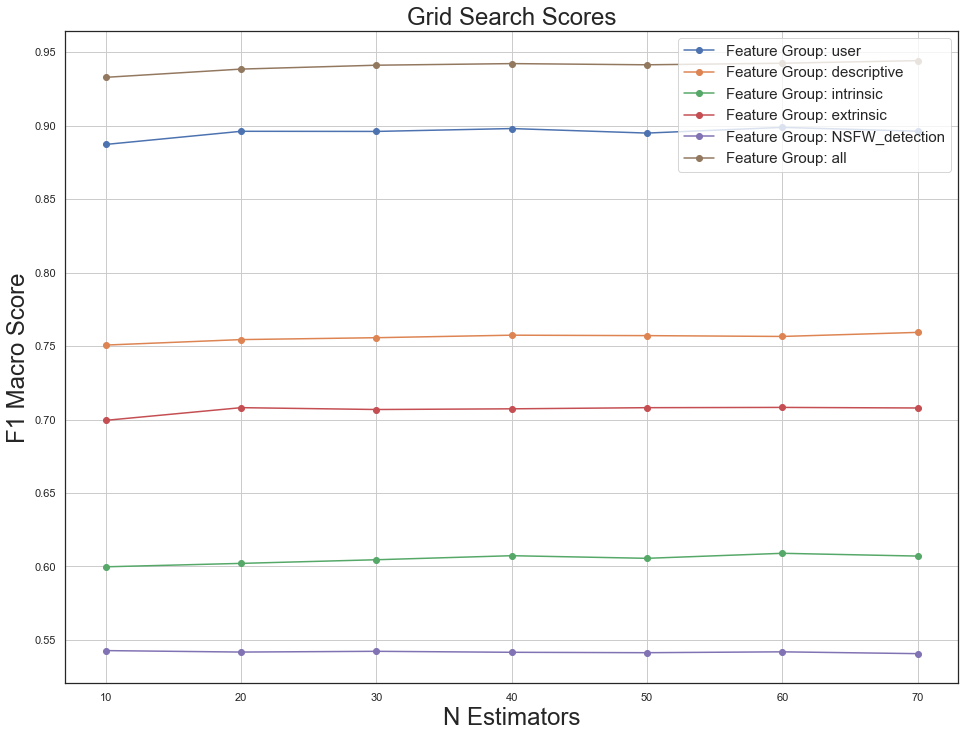

In [114]:
plot_grid_search(res, n_estimators, features, 'N Estimators', 'Feature Group')

In [120]:
params = {'n_estimators':[50,75,100,150,200,250], 'max_depth':[None,24,26,28], 'criterion':['gini','entropy']}

In [ ]:
grid = grid_eval(X,y, params)